# Shreya Akurathi
# 200968188
# LAB1- 17/3/22
# Exercise 1

In [2]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [5]:
#import dataset

df=pd.read_csv("C:\\Users\\shrey\\Downloads\\mtcars (1).csv");
df.head()


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
df.shape

(32, 12)

In [7]:
df.info

<bound method DataFrame.info of                   model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4   

## 1. Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line.

In [20]:
def myFnLinReg(X,Y):
    
    # mean of inputs and outputs
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    
    #total number of values
    n = len(X)
    
    # using the formula to calculate theta1 and theta0
    numerator = 0
    denominator = 0
    for i in range(n):
        numerator += (X[i] - x_mean) * (Y[i] - y_mean)
        denominator += (X[i] - x_mean) ** 2
    
    theta1 = numerator / denominator
    theta0 = y_mean - (theta1 * x_mean)
   
    return theta1, theta0
    #y=theta1x+theta0

## 2. Use mtcars data set and consider the attributes mpg andweight. Split data into train and test sets (70 %,30%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car.



In [22]:
x=df[["wt"]]
y=df[["mpg"]]

In [23]:
#7030split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
theta1,theta0= myFnLinReg(x_train.values,y_train.values)
theta1,theta0

(array([-5.35614652]), array([37.04389561]))

## 3. What is the mpg of a car, whose weight is 6.7?

In [25]:
print("mpg of a car, whose weight is 6.7 =",(theta1*6.7+theta0))

mpg of a car, whose weight is 6.7 = [1.15771395]


## 4. Compute and print accuracy measures such as RMSE and R2 for the test set.

In [26]:
predictions=[]

for i in range(len(x_test)):
    pred=(x_test.values[i]*theta1)+theta0
    predictions.append(pred)
    
predictions

[array([22.20736976]),
 array([7.9921569]),
 array([16.44951225]),
 array([25.26037327]),
 array([20.17203408]),
 array([18.61875159]),
 array([17.92245255]),
 array([26.6797521]),
 array([17.0654691]),
 array([23.01079174])]

In [27]:
y_test

,mpg
29,19.7
15,10.4
24,19.2
17,32.4
8,22.8
9,19.2
30,15.0
25,27.3
12,17.3
0,21.0


In [28]:
#calculate RMSE

numerator=0
denominator=0
for i in range(len(predictions)):

    numerator+=((predictions[i]-y_test.values[i])**2)
    denominator+=((predictions[i]-np.mean(y_test))**2)
    
    
rmse=np.sqrt(numerator/len(predictions))
rmse

array([3.01482741])

In [29]:
#CALCULATE RSQUARE
r2=1-(numerator/denominator)
r2

mpg    0.655335
dtype: float64

In [30]:
print("65% of the model fits the data")

65% of the model fits the data


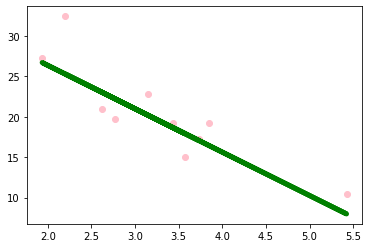

In [31]:
plt.scatter(x_test,y_test, color="pink")
plt.plot(x_test,predictions, color="green", linewidth=5)

## 5. Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function.

In [32]:
#STOCHASTICGRADIENT

import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.05):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
      
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list


w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(x_train.values,y_train.values.reshape(y_train.shape[0],),15000)
w_sgd, b_sgd, cost_sgd

(array([-5.24041538]), 37.06097516930209, 0.1257650400091044)

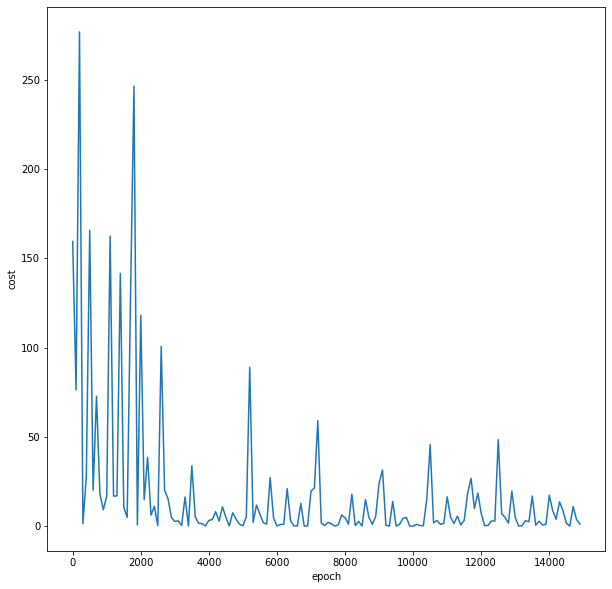

In [34]:
plt.figure(figsize=(10,10))
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)
plt.show()

In [35]:
#MINIBATCHGRADIENTDESCENT

import random
def mb_gradient_descent(X, y_true, epochs, learning_rate = 0.05):
 
    number_of_features = X.shape[1]
   
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        indices = np.random.randint(0,total_samples-1,10) #10 random indices for minibatch from total samples
        sample_x = X[indices]
        sample_y = y_true[indices]
        
    
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        
        b = b - learning_rate * b_grad
        b=b.mean()
        
        cost = np.square(sample_y-y_predicted)
        cost=cost.mean()
       
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = mb_gradient_descent(x_train.values,y_train.values.reshape(y_train.shape[0],),15000)
w_sgd, b_sgd, cost_sgd

(array([-5.24672116]), 36.80395059629801, 13.048546000593365)

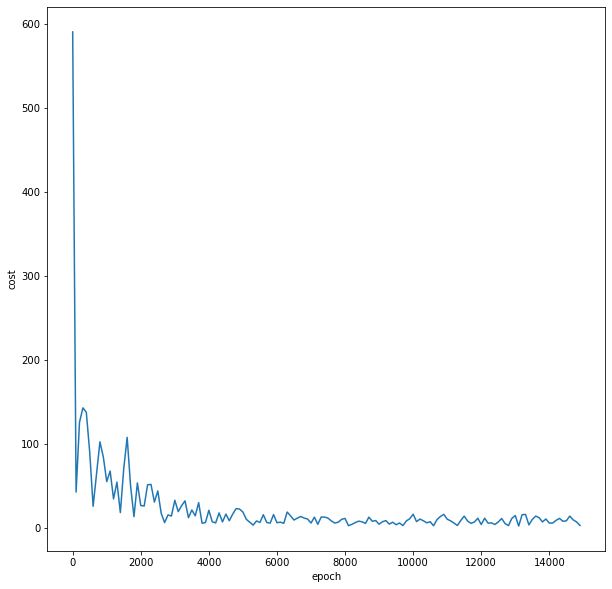

In [36]:
plt.figure(figsize=(10,10))
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)
plt.show()

# EXERCISE 2


METADATA
Number of Instances: 506

Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

Attribute Information:

1. CRIM  per capita crime rate by town
2. ZN    proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS proportion of non-retail business acres per town
4. CHAS  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX   nitric oxides concentration (parts per 10 million)
6. RM    average number of rooms per dwelling
7. AGE   proportion of owner-occupied units built prior to 1940
8. DIS   weighted distances to five Boston employment centres
9. RAD   index of accessibility to radial highways
10. TAX  full-value property-tax rate per $10,000

11. PTRATIO  pupil-teacher ratio by town
12. B      1000(Bk - 0.63)^2 where Bk= the proportion of blacks per town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

In [39]:
#IMPORTINGLIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
#IMPORTING DATASET
boston=pd.read_csv("C:\\Users\\shrey\\Downloads\\Boston.csv")
boston=boston.drop("Unnamed: 0",axis=1)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [41]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [42]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 1. Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’. 

In [43]:
corr=boston.corr()
corr.medv.sort_values(ascending=False) 

medv       1.000000
rm         0.695360
zn         0.360445
black      0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

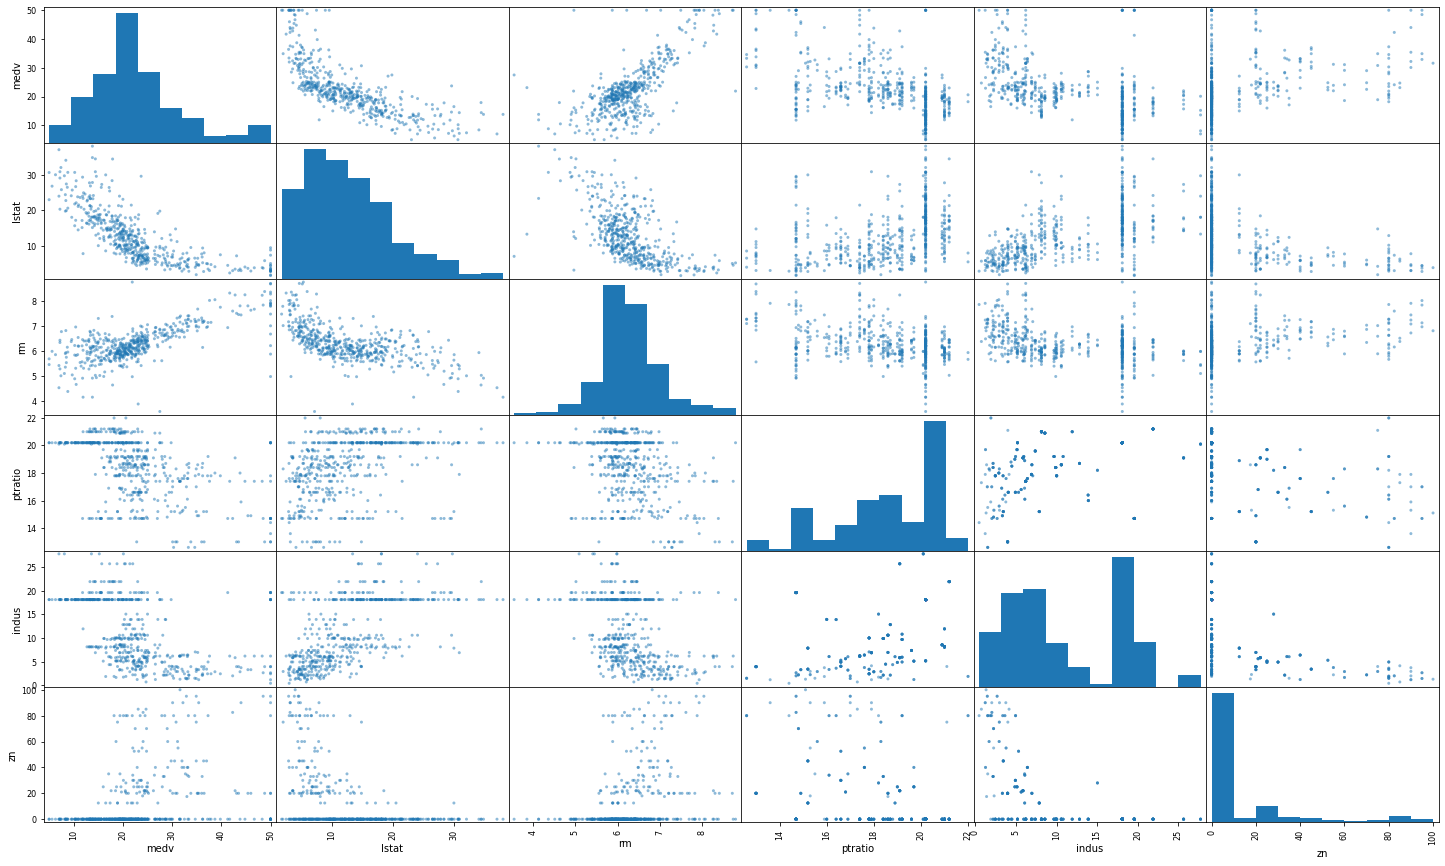

In [44]:
from pandas.plotting import scatter_matrix
attributes=["medv","lstat","rm","ptratio","indus","zn"]
scatter_matrix(boston[attributes],figsize=(25,15))
plt.show()

In [46]:
best5=boston[["lstat","rm","ptratio","indus","zn"]]
best5

,lstat,rm,ptratio,indus,zn
0,4.98,6.575,15.3,2.31,18.0
1,9.14,6.421,17.8,7.07,0.0
2,4.03,7.185,17.8,7.07,0.0
3,2.94,6.998,18.7,2.18,0.0
4,5.33,7.147,18.7,2.18,0.0
...,...,...,...,...,...
501,9.67,6.593,21.0,11.93,0.0
502,9.08,6.120,21.0,11.93,0.0
503,5.64,6.976,21.0,11.93,0.0
504,6.48,6.794,21.0,11.93,0.0


## 2. Using sklearn.linear_model, find the multiple regression model for theboston.csv dataset using the best 4 features. (from sklearn.linear_model import LinearRegression) 

In [47]:
best4=boston[["lstat","rm","ptratio","indus"]]
y=boston[["medv"]]

In [48]:
#80 20 split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(best4,y,test_size=0.2,random_state=42)

In [49]:
x_train

,lstat,rm,ptratio,indus
477,24.91,5.304,20.2,18.10
15,8.47,5.834,21.0,8.14
332,7.83,6.031,16.9,6.06
423,23.29,6.103,20.2,18.10
19,11.28,5.727,21.0,8.14
...,...,...,...,...
106,18.66,5.836,20.9,8.56
270,13.00,5.856,18.6,6.96
348,5.99,6.635,17.0,2.01
435,23.27,6.629,20.2,18.10


In [50]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression() #made an instance
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred=lr.predict(x_test)
y_pred[0:5]

array([[26.60441858],
       [30.67642176],
       [16.76611204],
       [24.80768516],
       [18.4403011 ]])

In [52]:
y_test.head()

,medv
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1


## 3. Find the accuracy of the model using appropriate metrics using 80, 20 split for training and test.

In [53]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

5.2200878935608745

In [54]:
print("The Root mean square error is 5.22 which is not good but also not that bad, as we have only 506 entries in our dataset")

The Root mean square error is 5.22 which is not good but also not that bad, as we have only 506 entries in our dataset


In [55]:
lr.coef_

array([[-0.58085937,  4.93755099, -0.87910694,  0.02624261]])

In [56]:
r2_score = lr.score(x_test,y_test)
print(r2_score*100,'%')

62.842067540783894 %


In [57]:
print("without any preprocressing and by selecting the top4 correlated attributes, our model is about 63% accurate")

without any preprocressing and by selecting the top4 correlated attributes, our model is about 63% accurate
